<a href="https://colab.research.google.com/github/fabiolapugli/Churn_Prediction/blob/master/ChurnPrediction_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction (Previsão de rotatividade)

## Fazendo upload do database

In [ ]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 print('User uploaded file "{name}" with length {length} bytes'.format(
 name=fn, length=len(uploaded[fn])))

## Importando as bibliotecas e o dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
contas = pd.read_csv('Orange_Telco.csv', sep=',')

## Analisando e removendo variáveis irrelevantes para o problema
- Ganho de informação para seleção de atributos (Não foi feito)

In [ ]:
contas.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
contas.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [ ]:
contas.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Binarização dos dados categóricos

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    contas[col] = lb.fit_transform(contas[col])

## Seleção de features

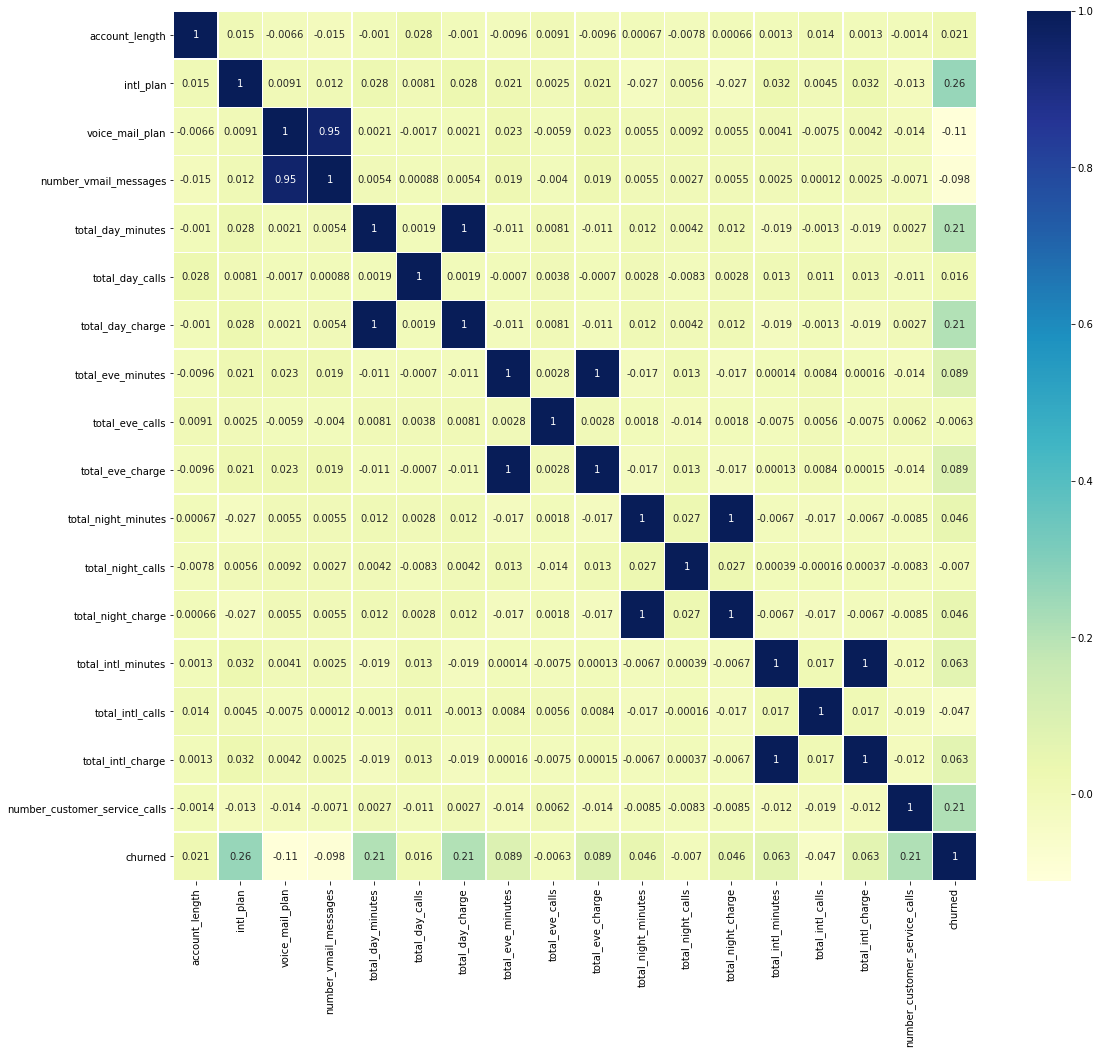

In [ ]:
fig_dims = (18, 16)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(contas.corr(), annot = True, cmap="YlGnBu",  linewidths=.5, ax=ax)

number_vmail_messages, total_day_charge, total_ve_charge, total_minutes_charge, total_intl_charge

In [ ]:
contas.drop(['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1, inplace=True)

## Verificando os dados das variáveis

In [ ]:
contas.describe()

,account_length,intl_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churned
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,0.094600,0.264600,180.288900,100.029400,200.636560,100.191000,200.391620,99.919200,10.261780,4.435200,1.570400,0.141400
std,39.69456,0.292691,0.441164,53.894699,19.831197,50.551309,19.826496,50.527789,19.958686,2.761396,2.456788,1.306363,0.348469
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,0.000000,143.700000,87.000000,166.375000,87.000000,166.900000,87.000000,8.500000,3.000000,1.000000,0.000000
50%,100.00000,0.000000,0.000000,180.100000,100.000000,201.000000,100.000000,200.400000,100.000000,10.300000,4.000000,1.000000,0.000000
75%,127.00000,0.000000,1.000000,216.200000,113.000000,234.100000,114.000000,234.700000,113.000000,12.000000,6.000000,2.000000,0.000000
max,243.00000,1.000000,1.000000,351.500000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,1.000000


In [ ]:
contas.dtypes

account_length                     int64
intl_plan                          int64
voice_mail_plan                    int64
total_day_minutes                float64
total_day_calls                    int64
total_eve_minutes                float64
total_eve_calls                    int64
total_night_minutes              float64
total_night_calls                  int64
total_intl_minutes               float64
total_intl_calls                   int64
number_customer_service_calls      int64
churned                            int64
dtype: object

Após a execução do dtypes possível perceber que intl_plan, voice_mail_plan e churned são variáveis categóricas, sendo assim precisamos convertê-las para um valor numérico.

## Normalizando as escalas via MinMax
* (dia, minuto) 
* Default 0 e 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

contas = pd.DataFrame(msc.fit_transform(contas),
                      columns=contas.columns)

Valors de K tendem a ser impares para não ter ricos de empate

## Separando os dados das classes

In [ ]:
X = contas.drop('churned', axis=1)
Y = contas['churned']

## Separando os dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

## Criando o modelo (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

## Matriz de confusão, Relatório de Classificação e Acurácia

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(confusion_matrix(Y_test, pred))

[[851  21]
 [ 80  48]]


In [ ]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       872
         1.0       0.70      0.38      0.49       128

    accuracy                           0.90      1000
   macro avg       0.80      0.68      0.72      1000
weighted avg       0.89      0.90      0.89      1000



In [ ]:
print(accuracy_score(Y_test, pred))

0.899


Apesar da alta acurácia de 0.91 é possível perceber que o recall (número de acertos) para a classe 1 é bastante baixo sendo apenas 0.45.

## Analisando as classes

In [ ]:
contas.shape[0]

5000

In [ ]:
contas.churned.value_counts()

0.0    4293
1.0     707
Name: churned, dtype: int64

In [ ]:
contas.churned.value_counts(normalize=True)

0.0    0.8586
1.0    0.1414
Name: churned, dtype: float64

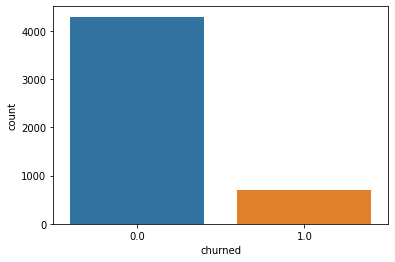

In [ ]:
ax = sns.countplot(x='churned', data=contas)

Depois da análise percebemos que as classes estão desbalanceadas, ou seja, existem mais amostras da classe 0 (Não) do que da classe 1 (Sim)

## Métodos para lidar com dados desbalanceados

### Undersampling (subamostragem)
É uma técnica utilizada para reduzir de forma aleatório os elementos da classe com maior número de amostras

Alguns Algoritmos:

* NearMiss
* Random undersampling
* Cluster
* Tomek links


### Oversample (superamostragem)
É uma técnica utilizada para redreplicar de forma aleatório os elementos da classe com menor número de amostras

Alguns Algoritmos:

* Random oversampling
* SMOTE
* ADASYN

## Instalando a biblioteca imblearn

In [ ]:
!pip install imblearn

## Undersampling com NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X = contas.drop('churned', axis=1)
Y = contas['churned']
X, Y = nr.fit_sample(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Após vamos verificar a quantidade de amostras das classes

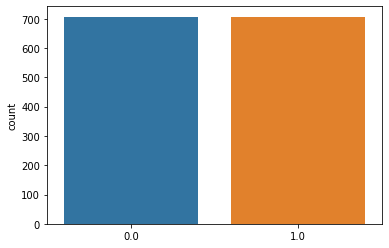

In [ ]:
ax = sns.countplot(x=Y)

Separando novamente os dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

Criando o modelo novamente

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

Matriz de confusão, Relatório de Classificação e Acurácia

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Matriz de Confusão:')
print(confusion_matrix(Y_test, pred))
print('Relatório de Classificação:')
print(classification_report(Y_test, pred))
print('Acurácia:')
print(accuracy_score(Y_test, pred))

Matriz de Confusão:
[[119  13]
 [ 64  87]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.65      0.90      0.76       132
         1.0       0.87      0.58      0.69       151

    accuracy                           0.73       283
   macro avg       0.76      0.74      0.72       283
weighted avg       0.77      0.73      0.72       283

Acurácia:
0.7279151943462897


Podemos observar que a acurácia diminuiu, mas em contra partida o recall para classe 1 aumentou.

## Oversample com SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X = contas.drop('churned', axis=1)
Y = contas['churned']
X, Y = smt.fit_sample(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Após vamos verificar a quantidade de amostras das classes

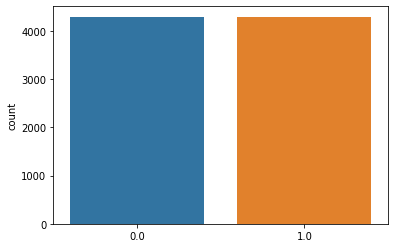

In [ ]:
ax = sns.countplot(x=Y)

Separando novamente os dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

Criando o modelo novamente

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

Matriz de confusão, Relatório de Classificação e Acurácia

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Matriz de Confusão:')
print(confusion_matrix(Y_test, pred))
print('Relatório de Classificação:')
print(classification_report(Y_test, pred))
print('Acurácia:')
print(accuracy_score(Y_test, pred))

Matriz de Confusão:
[[733 154]
 [  3 828]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.90       887
         1.0       0.84      1.00      0.91       831

    accuracy                           0.91      1718
   macro avg       0.92      0.91      0.91      1718
weighted avg       0.92      0.91      0.91      1718

Acurácia:
0.9086146682188592


Utilizando o algoritmo  de SMOTE podemos observar que a acurácia permaneceu quase a mesma, mas em contra partida o recall para classe 1 aumentou bastante.

## Verificando overfitting(Sobrajuste)/underfitting(Sobajuste)

Overfitting ->  Refere à situação em que um modelo se ajusta muito aos dados de treinamento. (Muito Treinado)

Underfitting -> Refere à situação em que um modelo se não se ajusta de forma adequada aos dados de treinamento. (Pouco Treinando)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

In [ ]:
neighbors = np.arange(1, 10)
train_scores = []
test_scores = []

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn = knn.fit(X_train, Y_train)

  # Dados de treino
  train_pred = knn.predict(X_train)
  train_acc = accuracy_score(Y_train, train_pred)
  train_scores.append(train_acc)


  # Dados de teste
  test_pred = knn.predict(X_test)
  test_acc = accuracy_score(Y_test, test_pred)
  test_scores.append(test_acc)

  print('>%d, train: %.3f, test: %.3f' % (k, train_acc, test_acc))

NameError: ignored

In [ ]:
# Grafico de treino e teste scores vs número de k-vizinhos
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)

ax.plot(neighbors, train_scores, '-o', label='Train')
ax.plot(neighbors, test_scores, '-o', label='Test')
ax.legend()

#definindo nome do eixo X
plt.xlabel('K-vizinhos')

#definindo nome do eixo Y
plt.ylabel('Score')

plt.title('Verificando overfitting/underfitting')
plt.show()
